In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/gdrive/My Drive/books_ALLFeatures.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'file', 'male_count', 'female_count', 'para_count',
       'Content', 'Book_Name', 'guten_genre', 'Author_Name', 'Puch', 'book_id',
       'Conj-Prep', 'clean_data', 'no_ofCommas', 'no_coln', 'no_period',
       'no_doubleQuotes', 'number_sen', 'lexical_diversity_score_onChunk',
       'normalized_ttr_chunk', 'flesh_reading_score', 'normalized_frs',
       'PropNouns', 'Compound', 'Neg', 'Neutral', 'Positive'],
      dtype='object')

In [ ]:
df['clean_data'][0]

' steeple church beautiful chime bell many year rung joyous peal touch sexton hand upon rope make full music said slumber christmas people shall glad right merry chime shall ring soon sleep gathered close embrace vision morrow flitted brain midnight dark cloud swept tower darker shadow discontent fell peaceful chime hark discordant sound heard among bell ringing seven long year murmured highest bell chime well placed said voice bell rung long enough besides weary always singing tone answered high bell clear sharp voice together make sweetest harmony returned bell next complainer well know tired tone bear monotony part mean answer call rope ring christmas exclaimed bell together exclaim much please common sympathy would moment weary singing high tone give note responded bell mean change weary note need change recast said bell sadly certainly like many silent morning sexton come ring answered bell boldly part silent refuse ring rest said remained quiet chime needed added sadly point rema

In [ ]:
df['file'][0]

'pg15895.txt'

In [ ]:
 # creating instance of one-hot-encoder
 enc = OneHotEncoder(handle_unknown='ignore')
 # passing bridge-types-cat column (label encoded values of bridge_types)
 enc_df = pd.DataFrame(enc.fit_transform(df[['Author_Name']]).toarray())
 # merge with main df bridge_df on key values
 del df['Author_Name']
 col_name=[]
 for i in range(enc_df.columns.start,enc_df.columns.stop,enc_df.columns.step):
    x="AutName"+(str(i))
    col_name.append(x)
 enc_df.columns=col_name
 df= df.join(enc_df)

In [ ]:
 enc1 = OneHotEncoder(handle_unknown='ignore')
 enc_df1 = pd.DataFrame(enc1.fit_transform(df[['Book_Name']]).toarray())
 # merge with main df bridge_df on key values
 del df['Book_Name']
 col_name=[]
 for i in range(enc_df1.columns.start,enc_df1.columns.stop,enc_df1.columns.step):
    x="Book_Name"+(str(i))
    col_name.append(x)
 enc_df1.columns=col_name
 df= df.join(enc_df1)

In [ ]:
alldata_train, alldata_test = train_test_split(df, test_size=0.3, random_state=42, stratify = np.array(df['guten_genre']))

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y_train = labelencoder.fit_transform(alldata_train['guten_genre'])
y_test = labelencoder.fit_transform(alldata_test['guten_genre'])
del alldata_train['guten_genre']
del alldata_test['guten_genre']


print(y_train.shape)
print(y_test.shape)

(695,)
(298,)


In [ ]:
print(y_test)

[5 5 5 5 2 5 5 5 5 2 5 2 7 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 5 2 5 2 5 5 2 5
 5 2 5 5 7 0 2 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 8 5 5
 5 5 5 5 5 5 7 5 5 2 5 5 3 5 5 5 5 5 5 7 7 5 2 5 5 5 2 5 5 5 5 5 5 5 5 5 5
 5 2 5 2 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 7 5 2 5 5 5 2 5 5 5 2 5 7 5 5
 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 1 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 2 2 5 5 5 5 5 2 6 8 5
 5 5 5 5 5 7 5 5 5 5 5 5 2 5 5 6 5 2 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5
 5 8 2 5 5 5 5 6 5 2 5 5 2 8 5 5 5 7 2 5 5 5 2 2 5 5 5 5 5 8 5 4 5 2 7 5 2
 5 5]


In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True)
X_train = vectorizer.fit_transform(alldata_train['clean_data']).toarray()
X_test = vectorizer.transform(alldata_test['clean_data']).toarray()
feature_names = vectorizer.get_feature_names()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(len(feature_names))

(695, 116855)
(298, 116855)
116855


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1168560   
_________________________________________________________________
dense_13 (Dense)             (None, 9)                 99        
Total params: 1,168,659
Trainable params: 1,168,659
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
10/10 [==============================] - 1s 70ms/step - loss: 1.8689 - accuracy: 0.7360 - val_loss: 1.4303 - val_accuracy: 0.8429
Epoch 2/100
10/10 [==============================] - 1s 61ms/step - loss: 1.3094 - accuracy: 0.7920 - val_loss: 1.0640 - val_accuracy: 0.8429
Epoch 3/100
10/10 [==============================] - 1s 62ms/step - loss: 1.0893 - accuracy: 0.7920 - val_loss: 0.9457 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 1s 62ms/step - loss: 0.9892 - accuracy: 0.7920 - val_loss: 0.8891 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 1s 63ms/step - loss: 0.8963 - accuracy: 0.7920 - val_loss: 0.8393 - val_accuracy: 0.8429
Epoch 6/100
10/10 [==============================] - 1s 61ms/step - loss: 0.8061 - accuracy: 0.7920 - val_loss: 0.7992 - val_accuracy: 0.8429
Epoch 7/100
10/10 [==============================] - 1s 62ms/step - loss: 0.7275 - accuracy: 0.7920 - val_loss: 0.7634 - val_accuracy: 0.8429
Epoch 

In [ ]:
predictions=model.predict_classes(X_test)
train_pred=model.predict_classes(X_train)

print("train accuracy: {} ".format(accuracy_score(y_train,train_pred,normalize=True, sample_weight=None)))
print("test accuracy: {} ".format(accuracy_score(y_test,predictions,normalize=True, sample_weight=None))) 
print('Testing F1 score: {}'.format(f1_score(y_test, predictions, average='weighted')))

train accuracy: 0.9424460431654677 
test accuracy: 0.8389261744966443 
Testing F1 score: 0.7870194852878393


In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 0s 7ms/step - loss: 0.5854 - accuracy: 0.8389
Test set
  Loss: 0.585
  Accuracy: 0.839


In [ ]:
print("Confusion Matrix:     ")
print(confusion_matrix(y_test, predictions))
        
print("\n\nClassification Report:       ")
print(classification_report(y_test, predictions))

Confusion Matrix:     
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0  11   0   0  22   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0 238   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  10   0   1   0]
 [  0   0   0   0   0   5   0   0   0]]


Classification Report:       
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.33      0.50        33
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.83      1.00      0.91       238
           6       0.00      0.00      0.00         5
           7       1.00      0.09      0.17        11
           8       0.00      0.00      0.00         5

    accuracy                           0.84       2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


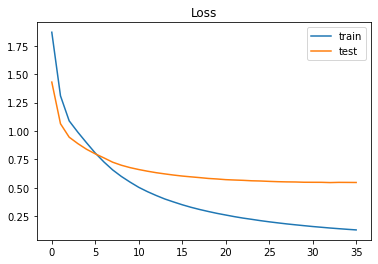

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

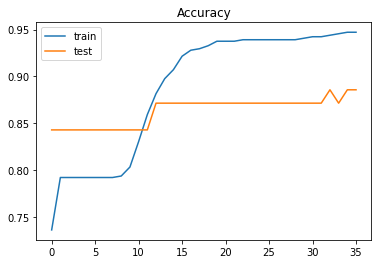

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();